In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:

from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
import os
import random
from tensorflow.keras.callbacks import EarlyStopping


In [8]:


def create_model(units,loss,activation,dropout,learning_rate,layer_weights):
  model = keras.Sequential()

  model.add(layers.Conv2D(units/2, (3, 3), activation=activation, input_shape=(64, 64, 3),kernel_initializer=layer_weights))
  model.add(layers.Conv2D(units, (3, 3), activation=activation))
  model.add(layers.Flatten())
  model.add(layers.Dense(units, activation=activation))
  model.add(layers.Dropout(rate=dropout))
  model.add(layers.Dense(1, activation=activation))
  tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
  return model

model = create_model(64,'binary_crossentropy','sigmoid',0.2,0.01,'glorot_uniform')
modelh = create_model(64,'Hinge','sigmoid',0.2,0.01,'glorot_uniform')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)




In [33]:
file_list = os.listdir('/content/drive/MyDrive/No/true')
image_files = [file for file in file_list]
positive = []
for image_file in image_files:
  file_path = os.path.join('/content/drive/MyDrive/No/true', image_file)
  positive.append(file_path)
file_list = os.listdir('/content/drive/MyDrive/faces')
image_files = [file for file in file_list]
for image_file in image_files:
  file_path = os.path.join('/content/drive/MyDrive/faces', image_file)
  positive.append(file_path)

file_list = os.listdir('/content/drive/MyDrive/false')
image_files = [file for file in file_list]
negative = []
for image_file in image_files:
  file_path = os.path.join('/content/drive/MyDrive/false', image_file)
  negative.append(file_path)
file_list = os.listdir('/content/drive/MyDrive/non_faces')
image_files = [file for file in file_list]
for image_file in image_files:
  file_path = os.path.join('/content/drive/MyDrive/non_faces', image_file)
  negative.append(file_path)

In [34]:
split_ratio = 0.70
val_ratio = 0.15
test_ratio = 0.15

random.shuffle(positive)
random.shuffle(positive)
y_positive = np.ones(len(positive))
y_negative = np.zeros(len(negative))

X = np.array([image.img_to_array(image.load_img(img, target_size=(64, 64))) for img in positive + negative])
y = np.concatenate([y_positive, y_negative])

X_train, X_val, X_test = X[:int(len(X)*0.7)], X[int(len(X)*0.7):int(len(X)*0.85)], X[int(len(X)*0.85):]
y_train, y_val, y_test = y[:int(len(y)*0.7)], y[int(len(y)*0.7):int(len(y)*0.85)], y[int(len(y)*0.85):]

X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [22]:
history = model.fit(X_train, y_train, epochs=10)


Epoch 1/20
64/64 [==============================] - 52.3s 0.8ms/step - training loss: 1.64 - validation loss: 1.61
Epoch 2/20
64/64 [==============================] - 52.4s 0.8ms/step - training loss: 1.33 - validation loss: 1.56
Epoch 3/20
64/64 [==============================] - 53.9s 0.8ms/step - training loss: 1.09 - validation loss: 1.54
Epoch 4/20
64/64 [==============================] - 56.4s 0.9ms/step - training loss: 0.98 - validation loss: 1.14
Epoch 5/20
64/64 [==============================] - 57.9s 0.9ms/step - training loss: 0.8 - validation loss: 1.0
Epoch 6/20
64/64 [==============================] - 52.5s 0.8ms/step - training loss: 0.55 - validation loss: 0.69
Epoch 7/20
64/64 [==============================] - 56.9s 0.9ms/step - training loss: 0.45 - validation loss: 0.61
Epoch 8/20
64/64 [==============================] - 57.7s 0.9ms/step - training loss: 0.41 - validation loss: 0.39
Epoch 9/20
64/64 [==============================] - 57.3s 0.9ms/step - training lo

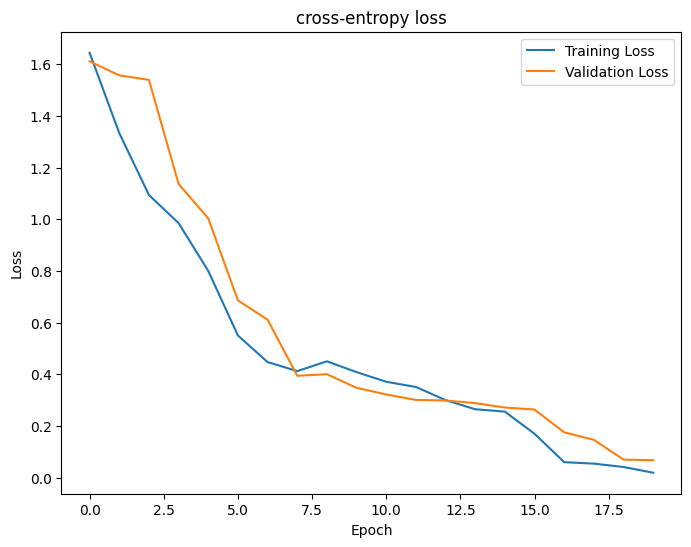

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(v_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('cross-entropy loss')
plt.legend()
plt.show()


In [43]:
historyh = modelh.fit(X_train, y_train, epochs=10)

Epoch 1/20
64/64 [==============================] - 50.9s 0.8ms/step - training loss: 1.97 - validation loss: 2.15
Epoch 2/20
64/64 [==============================] - 57.4s 0.9ms/step - training loss: 1.8 - validation loss: 1.77
Epoch 3/20
64/64 [==============================] - 58.3s 0.9ms/step - training loss: 1.78 - validation loss: 1.52
Epoch 4/20
64/64 [==============================] - 58.5s 0.9ms/step - training loss: 1.14 - validation loss: 1.41
Epoch 5/20
64/64 [==============================] - 52.9s 0.8ms/step - training loss: 0.69 - validation loss: 0.67
Epoch 6/20
64/64 [==============================] - 53.0s 0.8ms/step - training loss: 0.67 - validation loss: 0.62
Epoch 7/20
64/64 [==============================] - 56.7s 0.9ms/step - training loss: 0.64 - validation loss: 0.61
Epoch 8/20
64/64 [==============================] - 57.1s 0.9ms/step - training loss: 0.62 - validation loss: 0.57
Epoch 9/20
64/64 [==============================] - 50.9s 0.8ms/step - training l

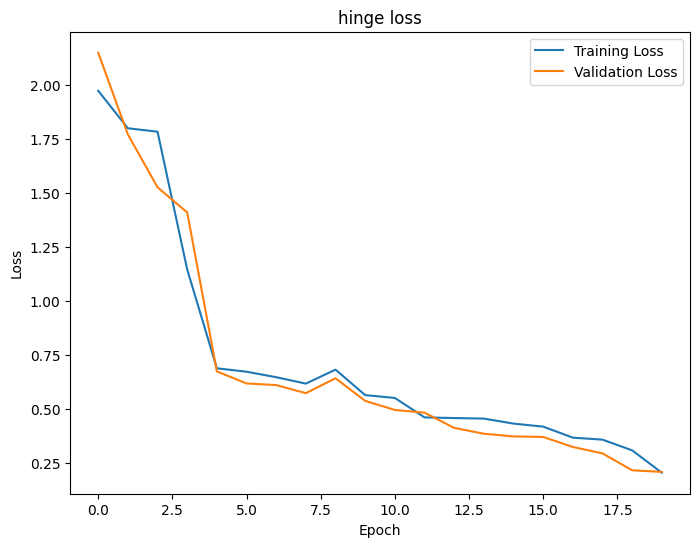

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(historyh.history['loss'], label='Training Loss')
plt.plot(v_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('hinge loss')
plt.legend()
plt.show()

In [55]:
param_dist = {
    'units': [32, 64],
    'learning_rate': [ 0.01, 0.1],
    'layer_weights': ['glorot_uniform', 'he_normal'],
    'loss':['binary_crossentropy','hinge'],
    'activation' : ['relu','sigmoid'],
    'dropout' : [0.2,0.4]

}


model1 = KerasClassifier(build_fn=create_model, verbose=0)
random_search = RandomizedSearchCV(
    estimator=model1,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)


best_params = random_search.best_params_

test_accuracy = best_model.evaluate(X_test, y_test)

In [59]:
print(best_params)

{'units': 64, 'learning_rate': 0.01, 'layer_weights': 'glorot_uniform', 'loss': 'hinge', 'activation': 'sigmoid', 'dropout': 0.2}


In [63]:
def create_model(units,loss,activation,dropout,learning_rate,layer_weights):
  model = keras.Sequential()

  model.add(layers.Conv2D(units/2, (3, 3), activation=activation, input_shape=(64, 64, 3),kernel_initializer=layer_weights,kernel_regularizer=tf.keras.regularizers.l2(0.01)))
  model.add(layers.Conv2D(units, (3, 3), activation=activation,kernel_regularizer=tf.keras.regularizers.l2(0.01)))
  model.add(layers.Conv2D(units*2, (3, 3), activation=activation,kernel_regularizer=tf.keras.regularizers.l2(0.01)))
  model.add(layers.Flatten())

  model.add(layers.Dropout(rate=dropout))
  model.add(layers.Dense(1, activation=activation,kernel_regularizer=tf.keras.regularizers.l2(0.00001)))
  tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
  return model

model2 = create_model(64,'hinge','sigmoid',0.2,0.01,'glorot_uniform')

In [48]:
history = model2.fit(X_train, y_train, epochs=10)


Epoch 1/20
64/64 [==============================] - 55.6s 0.9ms/step - training loss: 1.38 - validation loss: 1.77
Epoch 2/20
64/64 [==============================] - 56.6s 0.9ms/step - training loss: 1.36 - validation loss: 1.34
Epoch 3/20
64/64 [==============================] - 52.4s 0.8ms/step - training loss: 1.35 - validation loss: 1.3
Epoch 4/20
64/64 [==============================] - 57.5s 0.9ms/step - training loss: 1.22 - validation loss: 0.98
Epoch 5/20
64/64 [==============================] - 53.3s 0.8ms/step - training loss: 0.9 - validation loss: 0.96
Epoch 6/20
64/64 [==============================] - 54.6s 0.9ms/step - training loss: 0.62 - validation loss: 0.66
Epoch 7/20
64/64 [==============================] - 56.0s 0.9ms/step - training loss: 0.62 - validation loss: 0.59
Epoch 8/20
64/64 [==============================] - 53.2s 0.8ms/step - training loss: 0.6 - validation loss: 0.56
Epoch 9/20
64/64 [==============================] - 56.1s 0.9ms/step - training los

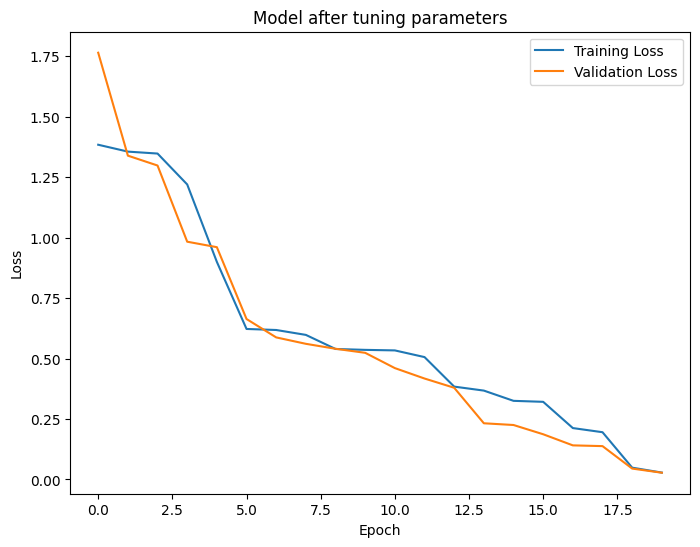

In [49]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(v_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model after tuning parameters')
plt.legend()
plt.show()